In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data = pd.read_csv('/content/bank-additional-full.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
data['y'] = data['y'].map({"yes":1,"no":0}) #Encoding

In [ ]:
data_category_column = data.columns[data.dtypes=='object'] #Which of the columns are categorical (text)
data_numeric_column = data.columns[data.dtypes!='object'] #Which of the columns are numeric

In [ ]:
print(data_category_column) #Names of category columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [ ]:
print(data_numeric_column) #Names of numeric columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


#Create data sub sets

In [ ]:
data_category = data[data_category_column] #Category Data


In [ ]:
data_numeric = data[data_numeric_column]  #Numeric Data

In [ ]:
data_category.shape

(41188, 10)

In [ ]:
data_numeric.shape

(41188, 11)

In [ ]:
data_category.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [ ]:
data_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


#Check for missing data

In [ ]:
data_category.isna().sum().sort_values(ascending=False)

poutcome       0
day_of_week    0
month          0
contact        0
loan           0
housing        0
default        0
education      0
marital        0
job            0
dtype: int64

In [ ]:
data_numeric.isna().sum().sort_values(ascending=False)

y                 0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
previous          0
pdays             0
campaign          0
duration          0
age               0
dtype: int64

In [ ]:
data_category.dtypes

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
dtype: object

#Use a loop to convert all object columns to category

In [ ]:
for column in data_category.columns:
  data_category[column] = data_category[column].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_category.dtypes

job            category
marital        category
education      category
default        category
housing        category
loan           category
contact        category
month          category
day_of_week    category
poutcome       category
dtype: object

In [ ]:
data_category.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [ ]:
data_numeric.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


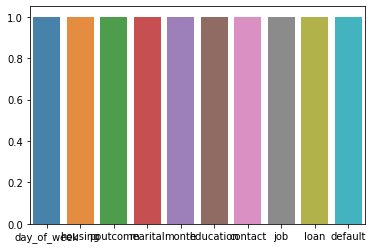

In [ ]:
category_count = data_category.columns.value_counts()
sns.barplot(category_count.index,category_count.values,alpha=0.9)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


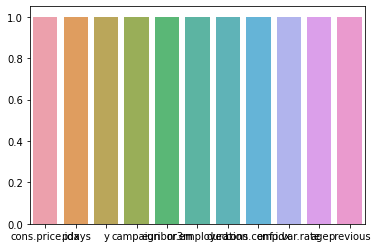

In [ ]:
numeric_count = data_numeric.columns.value_counts()
sns.barplot(numeric_count.index,numeric_count.values,alpha=0.9)
plt.show()

In [ ]:
data_category_X = pd.get_dummies(data_category)

In [ ]:
data_category_X.dtypes

job_admin.                       uint8
job_blue-collar                  uint8
job_entrepreneur                 uint8
job_housemaid                    uint8
job_management                   uint8
job_retired                      uint8
job_self-employed                uint8
job_services                     uint8
job_student                      uint8
job_technician                   uint8
job_unemployed                   uint8
job_unknown                      uint8
marital_divorced                 uint8
marital_married                  uint8
marital_single                   uint8
marital_unknown                  uint8
education_basic.4y               uint8
education_basic.6y               uint8
education_basic.9y               uint8
education_high.school            uint8
education_illiterate             uint8
education_professional.course    uint8
education_university.degree      uint8
education_unknown                uint8
default_no                       uint8
default_unknown          

In [ ]:
data_category_X.value_counts()

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  marital_unknown  education_basic.4y  education_basic.6y  education_basic.9y  education_high.school  education_illiterate  education_professional.course  education_university.degree  education_unknown  default_no  default_unknown  default_yes  housing_no  housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  contact_cellular  contact_telephone  month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success
1           0                0                 0              0               0            0                  0             0            0               0      

#Merging all data

Integrating category data with numeric data

In [ ]:
termdeposit_data = pd.concat([data_numeric,data_category_X],
                             join='outer',axis=1)
termdeposit_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
X= termdeposit_data.drop(columns=['y'])
y =termdeposit_data['y']

In [ ]:
X.shape,y.shape

((41188, 63), (41188,))

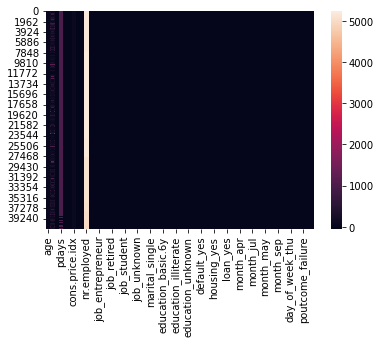

In [ ]:
sns.heatmap(X)

#Converting X and y to arrays

In [ ]:
X = termdeposit_data.iloc[:,:-1].values #features
y = termdeposit_data.iloc[:,-1].values #target

In [ ]:
X,y,X.shape,y.shape

(array([[ 56., 261.,   1., ...,   0.,   0.,   1.],
        [ 57., 149.,   1., ...,   0.,   0.,   1.],
        [ 37., 226.,   1., ...,   0.,   0.,   1.],
        ...,
        [ 56., 189.,   2., ...,   0.,   0.,   1.],
        [ 44., 442.,   1., ...,   0.,   0.,   1.],
        [ 74., 239.,   3., ...,   0.,   1.,   0.]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 (41188, 63),
 (41188,))

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,
                                             train_size=0.7,
                                             test_size=0.3,
                                             random_state=10)

In [ ]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((28831, 63), (12357, 63), (28831,), (12357,))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred=model.predict(Xtest)

In [ ]:
ypred

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
ypred = pd.DataFrame(ypred)


In [ ]:
ypred.value_counts()

0    11946
1      411
dtype: int64

In [ ]:
ytest

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
model.coef_  #Weights or coefficient

array([[ 9.66319975e-03, -1.29314361e-04, -2.25577762e-01,
        -4.20079237e-01, -1.79447399e+00,  2.39817425e-01,
        -2.14157529e-01, -1.51371893e-01,  7.29835343e-02,
         4.89357515e-03,  2.52008104e-01,  1.18758666e-01,
         2.24938233e-02,  2.90026982e-02, -2.55923455e-02,
        -3.95079376e-02, -2.96884713e-02, -6.79692884e-03,
        -5.03478419e-03, -1.14622976e-01,  2.23310641e-02,
         2.67049995e-02, -4.09253515e-04,  2.44161292e-02,
        -2.21531081e-02, -1.63495278e-02,  1.17250608e-02,
        -7.00111131e-02,  2.22934525e-02,  5.33354440e-02,
        -1.65422248e-01, -1.24946571e-07,  7.07027408e-02,
         1.05419398e-01, -1.86789953e-02, -2.44652323e-02,
         2.21038186e-02, -3.21377142e-08, -8.47200320e-02,
        -4.97999260e-02,  1.32158512e-01,  1.27917529e-01,
        -4.97999260e-02, -8.04790493e-02,  1.43116921e-02,
        -1.66731380e-02,  7.90356356e-02, -8.63715976e-02,
         3.14945660e-02,  1.06858463e-01, -2.80862685e-0

In [ ]:
model.intercept_

array([-0.00236248])

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
print(sklearn.metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11959
           1       0.96      0.99      0.97       398

    accuracy                           1.00     12357
   macro avg       0.98      0.99      0.99     12357
weighted avg       1.00      1.00      1.00     12357



In [ ]:
print(sklearn.metrics.confusion_matrix(ytest,ypred))

[[11942    17]
 [    4   394]]


In [ ]:
print(sklearn.metrics.accuracy_score(ytest,ypred))

0.9983005583879583


In [ ]:
depositors = pd.DataFrame(ypred)
depositors.value_counts() 

0    11946
1      411
dtype: int64

In [ ]:
print('Default Logistic Regression Accuracy Training Score',model.score(Xtrain,ytrain))
print('Default Logistic Regression Accuracy Test Score',model.score(Xtest,ytest))


Default Logistic Regression Accuracy Training Score 0.9979882765079255
Default Logistic Regression Accuracy Test Score 0.9983005583879583


#Logistic Regression using SGD Model

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf = SGDClassifier(loss='hinge',
                        penalty='l2',
                        max_iter=1000)

In [ ]:
sgd_clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.fit(Xtrain,ytrain)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print('Training Accuracy Score',sgd_clf.score(Xtrain,ytrain))
print('Validation Accuracy Score',sgd_clf.score(Xtest,ytest))

Training Accuracy Score 0.9965315112205612
Validation Accuracy Score 0.9965201909848669


In [ ]:
sgd_clf.predict(Xtest)

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
sgd_clf.coef_

array([[ 4.95940094e+01,  4.96462976e+00, -3.94638530e+00,
        -2.34020098e+02, -2.84447967e+01,  2.80292429e+00,
        -1.15160422e+01, -1.46528130e+01,  3.36568048e+00,
         8.45968509e-01,  5.23983097e+00,  1.48883853e+00,
         9.85220319e-01,  2.33921026e-01, -1.37600603e-02,
        -2.47681086e-01, -2.42177062e-01,  6.60482896e-02,
         7.70563378e-02, -3.18407796e+00, -1.76128772e-01,
         8.00835511e-01,  1.15584507e-01,  5.25634304e-01,
         6.76994968e-01, -1.45306237e+00,  1.54112676e-01,
        -7.10019113e-01,  2.91713279e-01,  1.05952464e+00,
        -2.76577213e+00,  0.00000000e+00,  3.16481387e-01,
         2.85934054e+00, -1.14758903e+00, -6.85251004e-01,
         5.88930582e-01,  0.00000000e+00, -2.08877716e+00,
        -7.51299294e-01,  2.74375603e+00,  1.64845523e+00,
        -7.51299294e-01, -9.93476355e-01,  4.67842051e-02,
        -1.43104627e-01,  1.87136820e+00, -2.12730533e+00,
         6.63234908e-01,  2.55937122e-01,  8.75139837e-0

In [ ]:
sgd_clf.intercept_

array([6.15561692])

In [ ]:
sgd_clf.decision_function(Xtest)

array([-226282.71245214, -225684.38312851,    6269.46211622, ...,
       -226747.99728167, -227337.46477829, -227335.34636833])

In [ ]:
sgd_clf = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log',
              max_iter=5, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False).fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
sgd_clf.predict_proba(Xtest)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
print(sgd_clf.predict_proba(Xtest))

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
sgd_ypred = sgd_clf.predict(Xtest)

In [ ]:
sklearn.metrics.accuracy_score(ytest,sgd_ypred)

0.9965201909848669

#Compare Various Models

In [ ]:
#Step 5: Build models 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier

# Spot Check Algorithms 
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))
models.append(('DecisionTree',DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))

In [ ]:
# evaluate each model in turn 
results = [] 
names = [] 
for name, model in models: 
 kfold = model_selection.KFold(n_splits=10, random_state=None) 
 cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy') 
 results.append(cv_results) 
 names.append(name) 
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
 print(msg) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.998127 (0.000866)
LDA: 0.996566 (0.000477)
KNN: 0.996289 (0.000516)
CART: 0.999965 (0.000104)
NB: 1.000000 (0.000000)
SVM: 0.996566 (0.000477)
DecisionTree: 1.000000 (0.000000)
Random Forest: 0.999931 (0.000139)


In [ ]:
#Now we can make prediction on most accurate model 
# Make predictions on validation dataset 
rf = RandomForestClassifier() 
rf.fit(Xtrain, ytrain) 
predictions = rf.predict(Xtest) 
print(accuracy_score(ytest, predictions)) 

print(confusion_matrix(ytest, predictions)) 

print(classification_report(ytest, predictions)) 

1.0
[[11959     0]
 [    0   398]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11959
           1       1.00      1.00      1.00       398

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357



**FROM ALL THE MODELS I GOT THE MOST ACCURACY IN NAIVE BAYES,DECISION TREE AND RANDOM FOREST MODELS**